In [252]:
#27/5/24 For the creation of an Autoencoder for Prediction
#Differs from other models in that it inputs an additional column for Toxicity_Value during training
#During testing the column in the test data is replaced with NaNs and its prediction efficacy is gauged

import pandas as pd
import numpy as np
targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/Targetdata/DrugTargets.csv')
autoencoder = keras.models.load_model('/Users/james/Documents/Honours/Python/Target_Selection/Drug_Targets/autoencode/bing.keras')

#Creating test/train splits
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(targetdata, test_size=0.2, random_state=82)
#Converts Toxicity Values to a list
ytrain = trainset['Toxicity_Values']
ytest = testset['Toxicity_Values']
#Converts encoded drug target values to an array
xtrain = trainset.iloc[:, 2:].values
xtest = testset.iloc[:, 2:].values
ncol = len(xtrain[0])

In [264]:
classify_train = autoencoder.fit(xtrain, ytrain, batch_size=64,epochs=100,verbose=1,validation_data=(xtest, ytest))


Epoch 1/100


2024-06-05 19:00:55.727109: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 19:00:55.727375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


166/166 [==============================] - 1s 5ms/step - loss: 0.7484 - val_loss: 0.6798
Epoch 2/100
 28/166 [====>.........................] - ETA: 0s - loss: 0.6803

2024-06-05 19:00:56.744969: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [2649,1]
	 [[{{node Placeholder/_11}}]]
2024-06-05 19:00:56.745090: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [2649,1]
	 [[{{node Placeholder/_11}}]]


166/166 [==============================] - 1s 4ms/step - loss: 0.6777 - val_loss: 0.6766
Epoch 3/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6760 - val_loss: 0.6758
Epoch 4/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6757 - val_loss: 0.6758
Epoch 5/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6756 - val_loss: 0.6756
Epoch 6/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6752 - val_loss: 0.6760
Epoch 7/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6754 - val_loss: 0.6755
Epoch 8/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6753 - val_loss: 0.6756
Epoch 9/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6754 - val_loss: 0.6754
Epoch 10/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6753 - val_loss: 0.6756
Epoch 11/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6754 - val_loss: 0.6756


166/166 [==============================] - 1s 4ms/step - loss: 0.6752 - val_loss: 0.6753
Epoch 83/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6752 - val_loss: 0.6753
Epoch 84/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6752 - val_loss: 0.6753
Epoch 85/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6752 - val_loss: 0.6753
Epoch 86/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6752 - val_loss: 0.6753
Epoch 87/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6752 - val_loss: 0.6753
Epoch 88/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6753 - val_loss: 0.6753
Epoch 89/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6752 - val_loss: 0.6753
Epoch 90/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6752 - val_loss: 0.6753
Epoch 91/100
166/166 [==============================] - 1s 4ms/step - loss: 0.6752 - val_loss: 

In [267]:
predicted_classes = classify_train.predict(xtest)

AttributeError: 'History' object has no attribute 'predict'

In [253]:
newlist = []
for items in ytrain:
    newlist.append(items)

ytrain = np.array(newlist)

In [193]:
#Testing with changing all tox vals to the mean
#Produced the following results:

#83/83 [==============================] - 0s 430us/step
#positives in data 1103
#negatives in data 1546 

#fn count = 84
#tn count = 135
#tp count = 1019
#fp count = 1411 

#fn rate = 0.3835616438356164
#fp rate = 0.5806584362139918 

#net accuracy = 0.4356360890902227
#positive accuracy = 0.9238440616500453
#negative accuracy = 0.08732212160413971 

#precision = 0.41934156378600823
#recall = 0.9238440616500453
#f1 score = 0.5768468723464477

#Clearly not good

#xtest['Toxicity_Values'] = np.nan
#xtest = xtest.values

#xtrain['Toxicity_Values'] = np.nan
#xtrain = xtrain.values
count = 0
for items in xtrain:
    count = count + items[0]
trmean = count / len(xtrain)

count = 0
for items in xtest:
    count = count + items[0]

temean = count / len(xtest)

In [194]:
count = 0
for items in xtrain:
    count = count + items[0]
for items in xtest:
    count = count + items[0]
mean = count / (len(xtest) + len(xtrain))

In [195]:
xtrain = xtrain.astype(float)
xtest = xtest.astype(float)

In [196]:
for row in xtrain:
    row[0] = mean
    
for row in xtest:
    row[0] = mean

In [197]:
import tensorflow as tf
from tensorflow import keras

# Determines layer size and input/output
# Here it turns the 334 one hot encoded features to 42
latent_space = 42
keras.utils.set_random_seed(81)
tf.config.experimental.enable_op_determinism()

# Encoder Creation
enc_in = keras.Input(shape=(ncol, 1))
x = keras.layers.Flatten()(enc_in)

# Additional encoder layers
x = keras.layers.Dense(160, activation="relu")(x)
x = keras.layers.Dense(81, activation="relu")(x)

enc_out = keras.layers.Dense(latent_space, activation="relu")(x)
encoder = keras.Model(enc_in, enc_out, name='encoder')

# Decoder Creation
decoder_in = keras.layers.Dense(latent_space, activation='relu')(enc_out)

# Additional decoder layers
x = keras.layers.Dense(81, activation='relu')(decoder_in)
x = keras.layers.Dense(160, activation='relu')(x)

x = keras.layers.Dense(ncol, activation='relu')(x)
decoder_out = keras.layers.Reshape((ncol,1))(x)

# Optimiser
optimise = tf.keras.optimizers.Adam()

# Model Creation
autoencoder = keras.Model(enc_in, decoder_out, name='autoencoder')

autoencoder.compile(optimise, loss='binary_crossentropy')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 334, 1)]          0         
                                                                 
 flatten_14 (Flatten)        (None, 334)               0         
                                                                 
 dense_89 (Dense)            (None, 160)               53600     
                                                                 
 dense_90 (Dense)            (None, 81)                13041     
                                                                 
 dense_91 (Dense)            (None, 42)                3444      
                                                                 
 dense_92 (Dense)            (None, 42)                1806      
                                                                 
 dense_93 (Dense)            (None, 81)                

In [213]:
#Testing a sequential autoencoder method

latent_space = 42
keras.utils.set_random_seed(81)
tf.config.experimental.enable_op_determinism()

autoencoder = keras.models.Sequential()

autoencoder.add(keras.Input(shape=(ncol, 1)))
autoencoder.add(keras.layers.Flatten())

autoencoder.add(keras.layers.Dense(160, input_shape=(ncol, 1), activation="relu"))
autoencoder.add(keras.layers.Dense(81, input_shape=(ncol, 1), activation="relu"))

autoencoder.add(keras.layers.Dense(latent_space, activation="relu"))
#autoencoder.add(keras.Model(enc_in, enc_out, name='encoder'))

# Decoder Creation
autoencoder.add(keras.layers.Dense(latent_space, activation='relu'))

# Additional decoder layers
autoencoder.add(keras.layers.Dense(81, activation='relu'))
autoencoder.add(keras.layers.Dense(160, activation='relu'))

autoencoder.add(keras.layers.Dense(ncol, activation='relu'))
autoencoder.add(keras.layers.Reshape((ncol,1)))

# Optimiser
optimise = tf.keras.optimizers.Adam()

# Model Creation
#autoencoder = keras.Model(enc_in, decoder_out, name='autoencoder')

autoencoder.compile(optimise, loss='binary_crossentropy')
autoencoder.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 334)               0         
                                                                 
 dense_101 (Dense)           (None, 160)               53600     
                                                                 
 dense_102 (Dense)           (None, 81)                13041     
                                                                 
 dense_103 (Dense)           (None, 42)                3444      
                                                                 
 dense_104 (Dense)           (None, 42)                1806      
                                                                 
 dense_105 (Dense)           (None, 81)                3483      
                                                                 
 dense_106 (Dense)           (None, 160)             

In [219]:
#Runs and creates the autoencoder and outputs parameters to a specs file
epochs = 4
batchsize = 3
for epoch in range(epochs):
    logs = autoencoder.fit(
    xtrain, ytrain,
    epochs=1,
    batch_size=batchsize,
#    validation_data=(xtrain, ytrain),
    validation_split=0.2,
    verbose=2
    )
    
    autoencoder.save(str(f"predmodels/AE-{epoch+1}.keras"))

2024-05-28 10:06:32.840676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [8476,334]
	 [[{{node Placeholder/_10}}]]
2024-05-28 10:06:32.840827: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [8476]
	 [[{{node Placeholder/_11}}]]


2826/2826 - 2s - loss: 1.2144 - val_loss: 1.1855 - 2s/epoch - 764us/step


2024-05-28 10:06:34.812960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [2119]
	 [[{{node Placeholder/_11}}]]
2024-05-28 10:06:34.813090: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [2119]
	 [[{{node Placeholder/_11}}]]
2024-05-28 10:06:35.050984: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [84

2826/2826 - 2s - loss: 1.0777 - val_loss: 1.0149 - 2s/epoch - 768us/step


2024-05-28 10:06:37.032471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [2119]
	 [[{{node Placeholder/_11}}]]
2024-05-28 10:06:37.032602: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [2119]
	 [[{{node Placeholder/_11}}]]
2024-05-28 10:06:37.261172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [84

2826/2826 - 2s - loss: 0.8501 - val_loss: 0.8124 - 2s/epoch - 772us/step


2024-05-28 10:06:39.482238: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [8476]
	 [[{{node Placeholder/_11}}]]
2024-05-28 10:06:39.482368: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [8476]
	 [[{{node Placeholder/_11}}]]
2024-05-28 10:06:41.439637: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [21

2826/2826 - 2s - loss: 0.7810 - val_loss: 0.7790 - 2s/epoch - 761us/step


In [254]:
predictions = (autoencoder.predict(xtest))

83/83 [==============================] - 0s 407us/step


2024-05-30 12:33:56.600661: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [2649,334]
	 [[{{node Placeholder/_10}}]]
2024-05-30 12:33:56.600772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [2649,334]
	 [[{{node Placeholder/_10}}]]


In [256]:
predlist = []
for pred in predictions:
    predlist.append(pred[0])

pos = []
neg = []
loops = 0
for items in predlist:
    if toxtest[loops] == 0:
        neg.append(items)
    else:
        pos.append(items)
    
    loops = loops + 1

negave = sum(neg) / len(neg)
posave = sum(pos) / len(pos)

print('negative average =',negave, '\n', 'positive average=', posave)

negative average = [0.01662353] 
 positive average= [0.01474316]


In [257]:
import statistics
print(statistics.median(neg), statistics.median(pos))

[6.69539e-05] [6.81152e-05]


In [260]:
preds = []
for item in predictions:
    preds.append(item[0])
    
loops = 0
for items in toxtest:
    print(items, preds[loops])
    loops = loops + 1

1 0.0012702486
1 0.0001020299
0 5.1700605e-05
0 5.886041e-05
1 2.4594786e-20
0 2.096768e-10
1 0.0012879021
1 0.006286377
1 4.1882703e-10
1 2.0477864e-06
0 5.0000923e-20
0 6.319797e-05
0 9.593712e-16
0 7.4606525e-09
1 6.312702e-11
0 0.011090392
0 0.122808516
0 3.5316654e-05
1 2.1386838e-06
1 1.7587747e-07
1 2.4932703e-07
1 0.0018457719
0 4.365334e-21
0 0.0009096759
0 0.00020394727
0 0.18020676
0 4.7428107e-06
1 7.472064e-05
1 4.9090284e-11
0 1.000017e-08
1 1.619535e-16
1 0.00019454827
0 0.0004919678
0 3.3102503e-18
1 0.009624813
0 2.7271277e-05
0 2.2055118e-09
0 0.00022396195
1 5.216204e-06
1 0.11752455
0 7.4440214e-09
1 0.32511148
0 0.0016209249
0 0.0075007244
0 0.0001985841
1 1.4895259e-06
0 4.2521167e-10
1 0.09821776
0 0.00011083575
0 0.003657641
1 1.574563e-07
0 0.0040516006
0 0.00012437305
0 2.4209285e-12
1 7.5802265e-05
0 0.00013485679
0 0.0005859913
1 0.0026301926
1 0.003500006
0 0.0012334208
1 0.053768046
1 9.129738e-05
0 0.0007702055
1 0.0016885125
0 0.0125027625
0 0.006360165


In [261]:
#Creation of ROC as a metric
#Function to calculate fpr and tpr of a model given its predictions, the actual values and a threshold
def ratecalc(predictions, threshold, toxtest):
    fpcount = 0
    tpcount = 0
    tncount = 0
    fncount = 0

    loops = 0
    for pred in predictions:
        predtox = pred[0]
        realtox = toxtest[loops]
        if predtox > threshold:
            if realtox != 0:
                tpcount = tpcount + 1
            else:
                fpcount = fpcount + 1
        else:
            if realtox != 0:
                fncount = fncount + 1
            else:
                tncount = tncount + 1

        loops = loops + 1

    fpr = fpcount / (fpcount + tncount)
    tpr = tpcount / (tpcount + fncount)
    
    return(fpr, tpr)

colcount = len(xtest[0])
ae_out = autoencoder.predict([ xtest.reshape(-1, colcount, 1) ])
predictions = ae_out.reshape(2649,colcount)

toxtest = []
for items in ytest:
    toxtest.append(items)

print(ratecalc(predictions, 0.5, toxtest))

83/83 [==============================] - 0s 474us/step
(0.0031766200762388818, 0.0018604651162790699)


2024-05-30 12:42:12.636677: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [2649,334,1]
	 [[{{node Placeholder/_10}}]]
2024-05-30 12:42:12.636802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [2649,334,1]
	 [[{{node Placeholder/_10}}]]


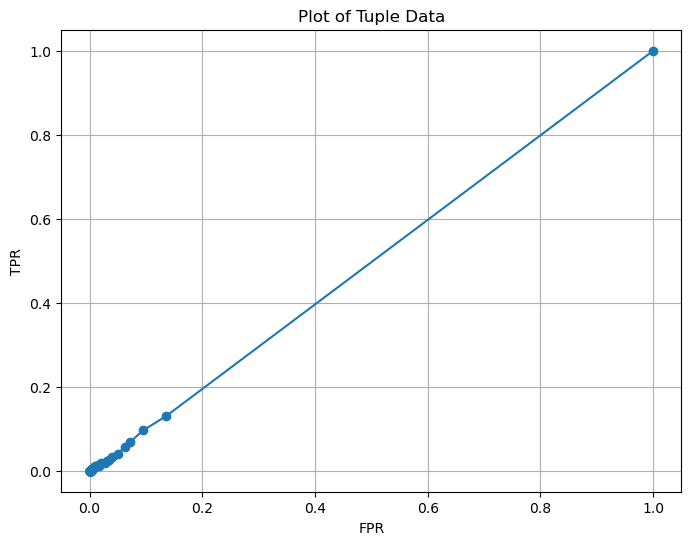

In [262]:
#ROC curve creation
ratelist = []
for threshold in np.arange(0, 2.1, 0.02):
    ratelist.append(ratecalc(predictions, threshold, toxtest))

import matplotlib.pyplot as plt
x_values = [x for x, y in ratelist]
y_values = [y for x, y in ratelist]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')

# Add titles and labels
plt.title('Plot of Tuple Data')
plt.xlabel('FPR')
plt.ylabel('TPR')

# Display the plot
plt.grid(True)
plt.show()

In [248]:
#Function to calculate net accuracy in relation to threshold
import math
def acccalc(predictions, threshold, toxtest):
    correctcount = 0
    fpcount = 0
    tpcount = 0
    tncount = 0
    fncount = 0
    testpos = 0
    testneg = 0

    loops = 0
    for pred in predictions:
        predtox = pred[0]
        realtox = toxtest[loops]
        if predtox > threshold:
            if realtox != 0:
                testpos = testpos + 1
                correctcount = correctcount + 1
                tpcount = tpcount + 1
            else:
                fpcount = fpcount + 1
                testneg = testneg + 1
        else:
            if realtox != 0:
                testpos = testpos + 1
                fncount = fncount + 1
            else:
                testneg = testneg + 1
                correctcount = correctcount + 1
                tncount = tncount + 1

        loops = loops + 1
        
    netacc = correctcount / (fpcount + fncount + tpcount + tncount)
    
    tp = tpcount
    fp = fpcount
    tn = tncount
    fn = fncount
    
    zertest = math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))
    if zertest == 0:
        return(0)
    mcc = ((tp * tn) - (fp * fn)) / zertest
    return(mcc)

colcount = len(xtest[0])
ae_out = autoencoder.predict([ xtest.reshape(-1, colcount, 1) ])
predictions = ae_out.reshape(2649,colcount)

toxtest = []
for items in ytest:
    toxtest.append(items)


83/83 [==============================] - 0s 441us/step


2024-05-28 10:44:47.708850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [2649,334,1]
	 [[{{node Placeholder/_10}}]]
2024-05-28 10:44:47.709026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [2649,334,1]
	 [[{{node Placeholder/_10}}]]


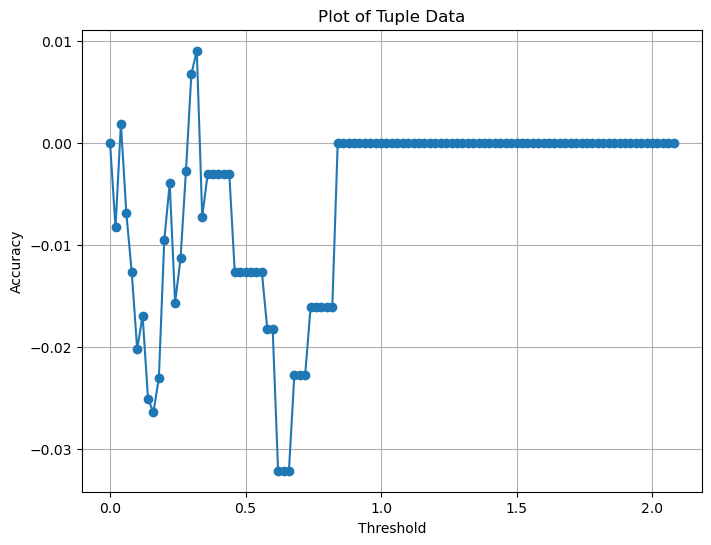

In [263]:
#acc curve creation
acclist = []
thresholdlist = []
for threshold in np.arange(0, 2.1, 0.02):
    acclist.append(acccalc(predictions, threshold, toxtest))
    thresholdlist.append(threshold)

import matplotlib.pyplot as plt
y_values = acclist
x_values = thresholdlist

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')

# Add titles and labels
plt.title('Plot of Tuple Data')
plt.ylabel('Accuracy')
plt.xlabel('Threshold')

# Display the plot
plt.grid(True)
plt.show()

In [250]:
import tensorflow as tf
from tensorflow import keras
#Softmax layer used for prediction
# Determines layer size and input/output
# Here it turns the 334 one hot encoded features to 42
#latent_space = 42
latent_space = 10
keras.utils.set_random_seed(81)
tf.config.experimental.enable_op_determinism()
length = len(xtrain[0])

# Encoder Creation
enc_in = keras.Input(shape=(length, 1))
x = keras.layers.Flatten()(enc_in)

# Additional encoder layers
x = keras.layers.Dense(160, activation="sigmoid")(x)
x = keras.layers.Dense(81, activation="sigmoid")(x)
x = keras.layers.Dense(42, activation="sigmoid")(x)

enc_out = keras.layers.Dense(latent_space, activation="sigmoid")(x)
encoder = keras.Model(enc_in, enc_out, name='encoder')
softmax = keras.layers.Softmax(axis=-1)(enc_out)

# Optimiser
optimise = tf.keras.optimizers.Adam()

# Model Creation
autoencoder = keras.Model(enc_in, softmax, name='autoencoder')

autoencoder.compile(optimise, loss='binary_crossentropy')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 334, 1)]          0         
                                                                 
 flatten_17 (Flatten)        (None, 334)               0         
                                                                 
 dense_108 (Dense)           (None, 160)               53600     
                                                                 
 dense_109 (Dense)           (None, 81)                13041     
                                                                 
 dense_110 (Dense)           (None, 42)                3444      
                                                                 
 dense_111 (Dense)           (None, 10)                430       
                                                                 
 softmax (Softmax)           (None, 10)                